### Normal Bone

* Healthy bone with normal density and structure.

* Provides strength, flexibility, and support to the body.

* Balanced process of bone formation and breakdown keeps bones strong.

### Osteoarthritis (OA)

* A degenerative joint disease where cartilage (the cushioning tissue) wears down.

* Leads to joint pain, stiffness, swelling, and reduced mobility.

* Common in knees, hips, hands, and spine; risk increases with age, obesity, or joint injury.

### Osteoporosis
* A condition where bones become weak and brittle due to low bone density.

* Increases the risk of fractures (especially spine, hip, and wrist).

* Often called a “silent disease” because bone loss happens without symptoms until a fracture occurs.

* More common in postmenopausal women and older adults.

In [3]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from sklearn.metrics import classification_report

tf.random.set_seed(23)

import os
import cv2
import random
import warnings
warnings.filterwarnings('ignore')

2025-09-24 14:57:43.302848: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 14:57:43.302979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 14:57:43.596167: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train_path = '/kaggle/input/bone-x-ray-image-dataset/BONE_X-ray_Images'
img_width,img_height,channel = 96,96,3

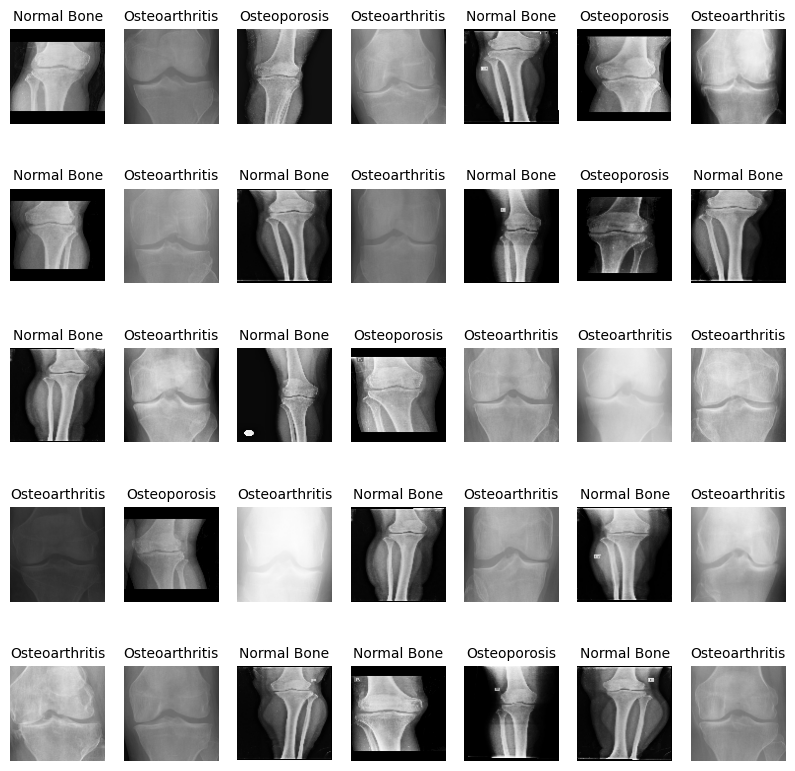

In [5]:
import os
import cv2
import random

classes = ['Normal Bone', 'Osteoarthritis', 'Osteoporosis']

def import_data(dataset, path, categories):
    for i in categories:
        full_path = os.path.join(path, i)
        label = categories.index(i)
        for j in os.listdir(full_path):
            try:
                # Read image in grayscale (black & white)
                img = cv2.imread(os.path.join(full_path, j), cv2.IMREAD_GRAYSCALE)
                
                # Resize image
                img_resized = cv2.resize(img, (img_width, img_height))
                img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
                # Append image and label
                dataset.append([img_resized, label])
            except :
                pass
    random.shuffle(dataset)
    return dataset

# creating the dataset

train_df = []
import_data(train_df,train_path,classes)
train_df = pd.DataFrame(train_df,columns=['image','label'])
train_stack = np.stack(train_df.image)

# Images,
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.imshow(train_df.image[i])
    plt.title(classes[train_df.label[i]],size=10)
    plt.axis('off')

In [6]:
# Train dataset
train_df.head(5)

,image,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
1,"[[[78, 78, 78], [80, 80, 80], [80, 80, 80], [8...",1
2,"[[[16, 16, 16], [15, 15, 15], [15, 15, 15], [1...",2
3,"[[[104, 104, 104], [105, 105, 105], [112, 112,...",1
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0


In [7]:
train_df.label.value_counts()

label
1    200
0    186
2    172
Name: count, dtype: int64

In [8]:
# Loading the pretrained models :
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, InceptionV3, MobileNet, Xception, NASNetMobile
from tensorflow.keras.applications import DenseNet121, EfficientNetB0

#NASNetMobile--------------------------------------------->
nasnetmobile = NASNetMobile(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

nasnetmobile.trainable = False

19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# model_1 NASNetMobile 

# let's build and train the model 
model_1 = Sequential()
model_1.add(nasnetmobile)
#ann layers
model_1.add(layers.Flatten())

model_1.add(layers.BatchNormalization())
model_1.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_1.add(layers.Dropout(0.2))



#no of classes is 3
model_1.add(layers.Dense(units=3,activation='softmax'))

model_1.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_1.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 3/14 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4097 - loss: 10.8537 

I0000 00:00:1758725941.877947      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1758725941.961902      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6231 - loss: 12.4094  

W0000 00:00:1758725970.562161      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.6293 - loss: 12.4512 - val_accuracy: 0.6875 - val_loss: 26.1558
Epoch 2/20
 5/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8550 - loss: 9.1907

W0000 00:00:1758725980.884234      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8387 - loss: 8.3571 - val_accuracy: 0.6786 - val_loss: 9.4052
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8583 - loss: 4.0946 - val_accuracy: 0.7054 - val_loss: 3.6886
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8600 - loss: 2.0602 - val_accuracy: 0.6696 - val_loss: 3.9634
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8964 - loss: 1.3235 - val_accuracy: 0.7232 - val_loss: 2.0553
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8526 - loss: 1.3243 - val_accuracy: 0.6786 - val_loss: 2.7282
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8758 - loss: 1.4575 - val_accuracy: 0.6875 - val_loss: 1.7057
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8590 - loss: 1.1549 - val_accuracy: 0.7321 - val_loss: 1.8645
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8477 - loss: 1.1860 - val_accuracy: 0.7589 - val_loss: 1.

<Axes: title={'center': 'NASNetMobile'}>

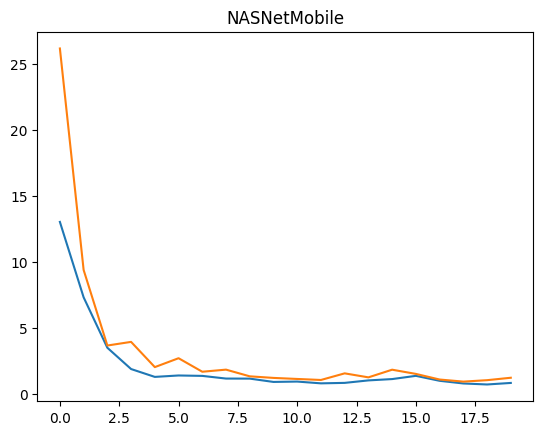

In [10]:
plt.title('NASNetMobile')
sns.lineplot(model_1.history.history['loss'])
sns.lineplot(model_1.history.history['val_loss'])

In [14]:
import os
if os.path.exists("Bone_x_ray_img_Detection_model.keras"):
    os.remove("Bone_x_ray_img_Detection_model.keras")

model_1.save("Bone_x_ray_img_Detection_model.keras")